# Importing the required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Reading the dataset

In [3]:
art = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-8_SVM\artificialcharacters.csv")

# A glimpse into the dataset

In [4]:
art.head()

,V1,V2,V3,V4,V5,V6,V7,Class
0,0,0,0,0,20,20.00,46.1,1
1,1,19,0,19,8,8.00,46.1,1
2,2,0,20,19,8,22.47,46.1,1
3,3,0,20,8,42,23.41,46.1,1
4,4,19,8,8,42,35.74,46.1,1


In [5]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10218 entries, 0 to 10217
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10218 non-null  int64  
 1   V2      10218 non-null  int64  
 2   V3      10218 non-null  int64  
 3   V4      10218 non-null  int64  
 4   V5      10218 non-null  int64  
 5   V6      10218 non-null  float64
 6   V7      10218 non-null  float64
 7   Class   10218 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 638.8 KB


# Segregating the columns

In [5]:
target = 'Class'

In [7]:
numerical = art.columns.difference([target])

# Test-Train Split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(art,
    art[target],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)

In [9]:
X_train.pop('Class')
X_test.pop('Class')

6054    4
4994    2
467     1
6694    6
4955    2
       ..
33      1
2390    6
9388    2
2839    7
683     1
Name: Class, Length: 1022, dtype: int64

# Training the SVM model

In [10]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [11]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [12]:
metrics.accuracy_score(y_train,y_pred_train)

0.5637233579817312

In [13]:
metrics.accuracy_score(y_test,y_pred_test)

0.547945205479452

# Hyperparameter tuning

## Type of kernel

In [14]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
 clf = svm.SVC(kernel=i)
 clf.fit(X_train, y_train)
 y_pred_train = clf.predict(X_train)
 y_pred_test = clf.predict(X_test)
 train = metrics.accuracy_score(y_train,y_pred_train)
 test = metrics.accuracy_score(y_test,y_pred_test)
 print(i,train,test)

linear 0.4524793388429752 0.42759295499021527
poly 0.5468682035667681 0.5293542074363993
rbf 0.5637233579817312 0.547945205479452
sigmoid 0.07796868203566769 0.06947162426614481


For this data, polynomial hyperplane or decision boundary is performing better.
So, polynomial and rbf kernel are better for this data.

## Gamma Parameter

In [15]:
print("Kernel Gamma Train Acc. Test Acc.")
for i in ['linear','rbf']:
    for j in ["auto","scale"]:
        clf = svm.SVC(kernel=i,gamma=j)
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        train = metrics.accuracy_score(y_train,y_pred_train)
        test = metrics.accuracy_score(y_test,y_pred_test)
        print(i,j,train,test)

Kernel Gamma Train Acc. Test Acc.
linear auto 0.4524793388429752 0.42759295499021527
linear scale 0.4524793388429752 0.42759295499021527
rbf auto 0.9175728577642454 0.8062622309197651
rbf scale 0.5637233579817312 0.547945205479452


The rbf kernel with gamma='auto' is giving the best results among all other combinations of gamma and kernel type. So, we will tune the SVM model further.

## Regularisation Parameter(C)

In [16]:
tr = []
tst = []
for k in range(1,30):
        clf = svm.SVC(kernel='rbf',gamma='auto',C=k)
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        tr.append(metrics.accuracy_score(y_train,y_pred_train))
        tst.append(metrics.accuracy_score(y_test,y_pred_test))

Inferences :
- The parameter 'C' is a regularisation parameter. Such that the regularisation is inversely proportional to the value of C. 
- For the SVM, a higher value of C will reduce margins leading to an improvement in the training accuracy. 
- On the contrary, a smaller value of C will increase the margins. 
- However, increasing C a lot may lead to overfitting of the model.

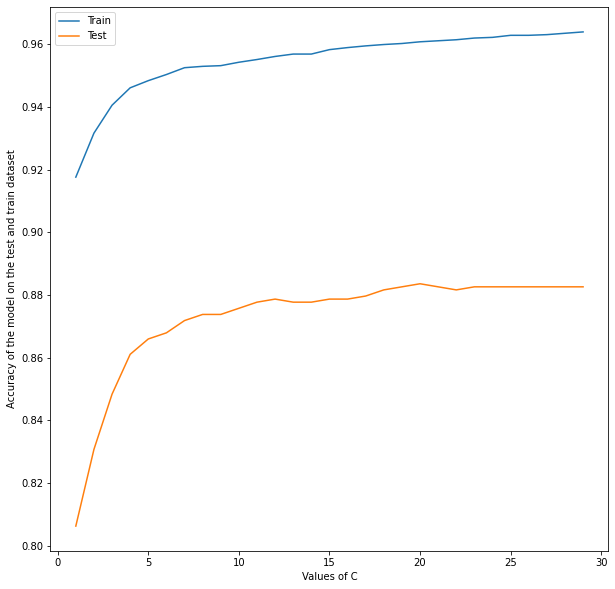

In [18]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),tr)
plt.plot(range(1,30),tst)
plt.xlabel("Values of C")
plt.ylabel("Accuracy of the model on the test and train dataset")
plt.legend(["Train","Test"])
plt.show()

# Final Model

In [31]:
d = list(np.array(tr)-np.array(tst))
print(tr[d.index(np.min(d))],tst[d.index(np.min(d))])

0.9607438016528925 0.8835616438356164
